In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
import json
file_path = './all_tests_results.json'

try:
    with open(file_path, 'r') as file:
        data = json.load(file)
    df = pd.DataFrame(data)
    
except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")
    data = None

In [52]:
df

,instance_count,pub_qos,delay,message_size,sub_qos,total_messages_received,total_mean_rate,average_loss_rate,average_out_of_order_rate,average_duplicate_rate,average_mean_gap,average_stdev_gap,sys_data
0,1,0,0,0,0,3635113,121170.433333,32.567696,0.0,0.0,0.008328,0.040283,"{'received_published_messages': [[4575.77, 174..."
1,1,1,0,0,0,75297,2509.900000,99.143520,0.0,0.0,0.416305,2.606511,"{'received_published_messages': [[4575.77, 174..."
2,1,2,0,0,0,70793,2359.766667,99.194339,0.0,0.0,0.447340,4.830204,"{'received_published_messages': [[4575.77, 174..."
3,1,0,0,0,1,3562874,118762.466667,32.058163,0.0,0.0,0.008500,0.041759,"{'received_published_messages': [[4575.77, 174..."
4,1,1,0,0,1,77735,2591.166667,99.116034,0.0,0.0,0.402287,2.348819,"{'received_published_messages': [[4575.77, 174..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,10,1,100,4000,1,2787,92.900000,7.100000,0.0,0.0,107.827281,3.604103,"{'received_published_messages': [[4575.77, 174..."
158,10,2,100,4000,1,2791,93.033333,6.966667,0.0,0.0,107.695379,3.152364,"{'received_published_messages': [[4575.77, 174..."
159,10,0,100,4000,2,2791,93.033333,6.966667,0.0,0.0,107.626130,3.037956,"{'received_published_messages': [[4575.77, 174..."
160,10,1,100,4000,2,2789,92.966667,7.033333,0.0,0.0,107.726333,3.047110,"{'received_published_messages': [[4575.77, 174..."


In [53]:
FIG_SIZE=(7, 5)

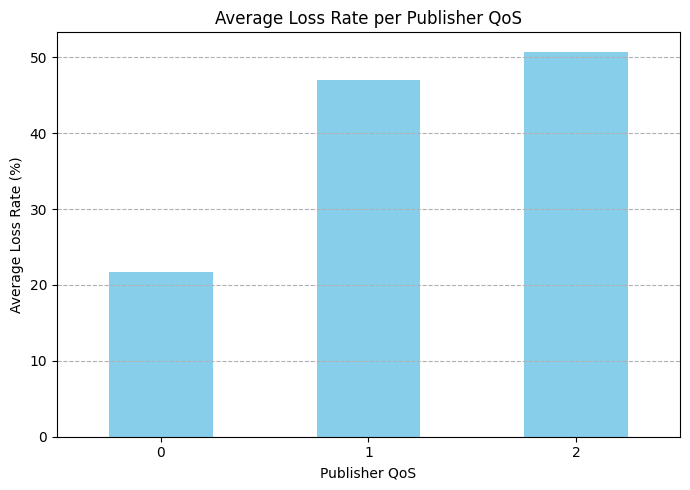

In [54]:
# Group by publisher QoS and calculate the mean of average_loss_rate
average_loss_rate_per_qos = df.groupby('pub_qos')['average_loss_rate'].mean()

# Create the bar chart
plt.figure(figsize=FIG_SIZE)
average_loss_rate_per_qos.plot(kind='bar', color='skyblue')
plt.title('Average Loss Rate per Publisher QoS')
plt.xlabel('Publisher QoS')
plt.ylabel('Average Loss Rate (%)')
plt.xticks(rotation=0)  
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

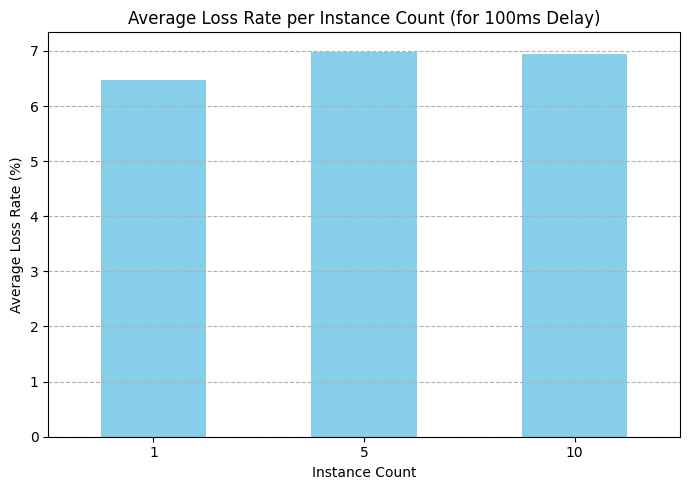

In [55]:
# Filter DataFrame for 0ms delay
df_0_delay = df[df['delay'] == 100]

# Group by instance_count and calculate the mean of average_loss_rate
average_loss_rate_per_instance_0_delay = df_0_delay.groupby('instance_count')['average_loss_rate'].mean()

plt.figure(figsize=FIG_SIZE)
average_loss_rate_per_instance_0_delay.plot(kind='bar', color='skyblue')
plt.title('Average Loss Rate per Instance Count (for 100ms Delay)')
plt.xlabel('Instance Count')
plt.ylabel('Average Loss Rate (%)')
plt.xticks(rotation=0)  
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

Available 'delay' values for pub_qos=2 in the dataset: [np.int64(0), np.int64(100)]


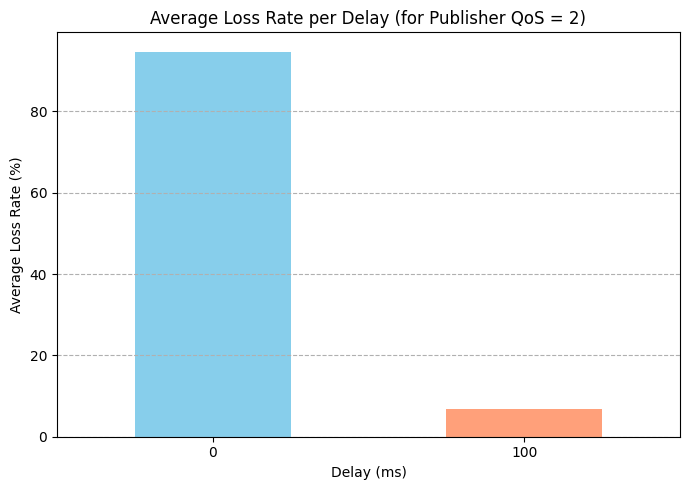

In [56]:
if 'df' in locals() and df is not None:
    # Filter for pub_qos = 2
    df_qos2 = df[df['pub_qos'] == 2].copy() 

    # Check available delay values for pub_qos=2
    available_delays_qos2 = sorted(df_qos2['delay'].unique())
    print(f"Available 'delay' values for pub_qos=2 in the dataset: {available_delays_qos2}")

    if not df_qos2.empty:
        avg_loss_rate_per_delay_qos2 = df_qos2.groupby('delay')['average_loss_rate'].mean()

        if not avg_loss_rate_per_delay_qos2.empty:
            plt.figure(figsize=FIG_SIZE)
            avg_loss_rate_per_delay_qos2.plot(kind='bar', color=['skyblue', 'lightsalmon'])
            
            plt.title('Average Loss Rate per Delay (for Publisher QoS = 2)')
            plt.xlabel('Delay (ms)')
            plt.ylabel('Average Loss Rate (%)')
            plt.xticks(rotation=0)  
            plt.grid(axis='y', linestyle='--')
            plt.tight_layout()
            plt.show()
        else:
            print("No data available to plot after grouping by 'delay' for pub_qos=2.")
    else:
        print("No data found for pub_qos = 2 in the DataFrame.")
else:
    print("DataFrame 'df' not found or is None. Please ensure it is loaded in a previous cell.")


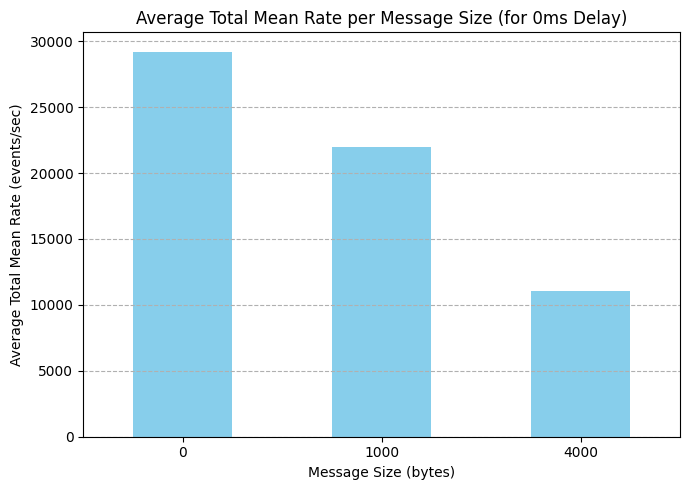

In [57]:
if 'df' in locals() and df is not None:
    # 1Filter for delay = 0ms
    df_delay0 = df[df['delay'] == 0].copy() 

    if not df_delay0.empty:
        # Group by 'message_size' and calculate the mean of 'total_mean_rate'
        avg_total_mean_rate_per_msg_size_delay0 = df_delay0.groupby('message_size')['total_mean_rate'].mean()

        if not avg_total_mean_rate_per_msg_size_delay0.empty:
            plt.figure(figsize=FIG_SIZE) 
            avg_total_mean_rate_per_msg_size_delay0.plot(kind='bar', color='skyblue')
            
            plt.title('Average Total Mean Rate per Message Size (for 0ms Delay)')
            plt.xlabel('Message Size (bytes)')
            plt.ylabel('Average Total Mean Rate (events/sec)') 
            plt.xticks(rotation=0)  
            plt.grid(axis='y', linestyle='--')
            plt.tight_layout()
            plt.show()
        else:
            print("No data available to plot after grouping by 'message_size' for 0ms delay.")
    else:
        print("No data found for 0ms delay in the DataFrame.")
else:
    print("DataFrame 'df' not found or is None. Please ensure it is loaded in a previous cell.")



--- Plotting Message Rates and Memory Usage ---


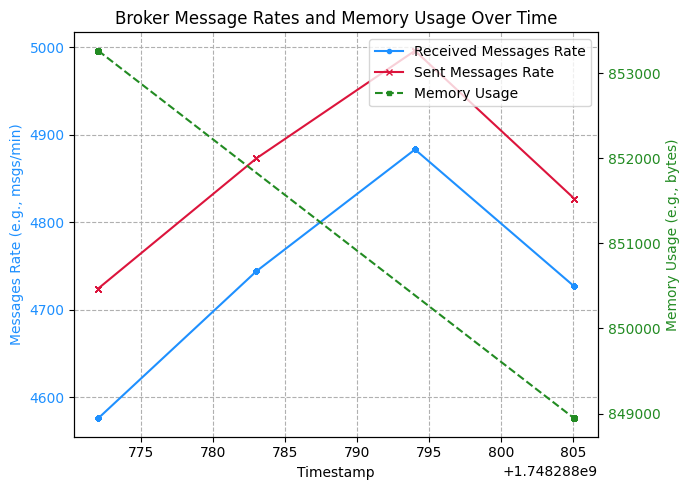

In [58]:
all_received_rate_points = []
all_sent_rate_points = []
all_memory_usage_points = []

if df is not None: 
    for index, row in df.iterrows():
        sys_data_entry = row['sys_data']
        if isinstance(sys_data_entry, dict):
            # Extract received messages rate
            if 'received_published_messages' in sys_data_entry and \
               isinstance(sys_data_entry['received_published_messages'], list):
                for item in sys_data_entry['received_published_messages']:
                    if isinstance(item, (list, tuple)) and len(item) == 2:
                        all_received_rate_points.append((item[1], item[0])) # (timestamp, rate_value)

            # Extract sent messages rate
            if 'sent_published_messages' in sys_data_entry and \
               isinstance(sys_data_entry['sent_published_messages'], list):
                for item in sys_data_entry['sent_published_messages']:
                    if isinstance(item, (list, tuple)) and len(item) == 2:
                        all_sent_rate_points.append((item[1], item[0])) # (timestamp, rate_value)
            
            # Extract memory usage
            if 'memory_usage' in sys_data_entry and \
               isinstance(sys_data_entry['memory_usage'], list):
                for item in sys_data_entry['memory_usage']:
                    if isinstance(item, (list, tuple)) and len(item) == 2:
                        all_memory_usage_points.append((item[1], item[0])) # (timestamp, memory_value)

    # Sort all lists by timestamp
    all_received_rate_points.sort(key=lambda x: x[0])
    all_sent_rate_points.sort(key=lambda x: x[0])
    all_memory_usage_points.sort(key=lambda x: x[0])

    # 4. Prepare data for plotting
    received_timestamps = [point[0] for point in all_received_rate_points]
    received_rates = [point[1] for point in all_received_rate_points]

    sent_timestamps = [point[0] for point in all_sent_rate_points]
    sent_rates = [point[1] for point in all_sent_rate_points]
    
    memory_timestamps = [point[0] for point in all_memory_usage_points]
    memory_values = [point[1] for point in all_memory_usage_points]


    print(f"\n--- Plotting Message Rates and Memory Usage ---")
    
    fig, ax1 = plt.subplots(figsize=FIG_SIZE) 

    plot_successful = False
    lines = [] 

    color_received = 'dodgerblue'
    ax1.set_xlabel('Timestamp')
    ax1.set_ylabel('Messages Rate (e.g., msgs/min)', color=color_received)
    if received_timestamps:
        line1, = ax1.plot(received_timestamps, received_rates, linestyle='-', marker='o', markersize=3, color=color_received, label='Received Messages Rate')
        lines.append(line1)
        plot_successful = True
    ax1.tick_params(axis='y', labelcolor=color_received)

    color_sent = 'crimson'
    if sent_timestamps:
        line2, = ax1.plot(sent_timestamps, sent_rates, linestyle='-', marker='x', markersize=4, color=color_sent, label='Sent Messages Rate')
        lines.append(line2)
        plot_successful = True

    ax2 = ax1.twinx() 
    color_memory = 'forestgreen'
    ax2.set_ylabel('Memory Usage (e.g., bytes)', color=color_memory)
    if memory_timestamps:
        line3, = ax2.plot(memory_timestamps, memory_values, linestyle='--', marker='s', markersize=3, color=color_memory, label='Memory Usage') 
        lines.append(line3)
        plot_successful = True
    ax2.tick_params(axis='y', labelcolor=color_memory)

    if plot_successful:
        plt.title('Broker Message Rates and Memory Usage Over Time')
        plt.legend(handles=lines, loc='best')
        ax1.grid(True, linestyle='--') 
    else:
        ax1.text(0.5, 0.5, 'No data points found for plotting.',
                 horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
        plt.title('Broker Message Rates and Memory Usage Over Time')
        
    fig.tight_layout() 
    plt.show()

else:
    print("DataFrame 'df' not found or is None. Please ensure it is loaded in a previous cell.")


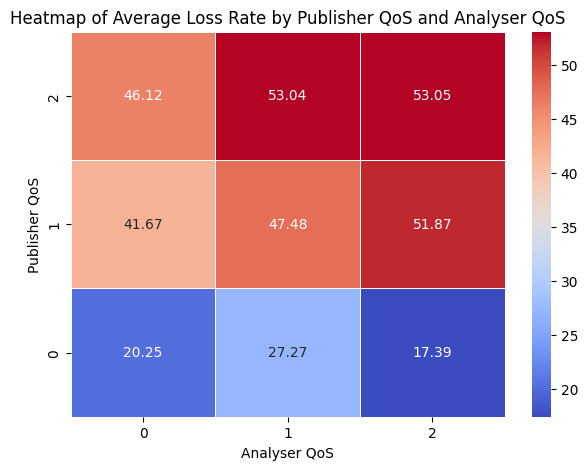

In [59]:
if 'df' in locals() and df is not None:
    # Group by 'pub_qos' and 'sub_qos', then calculate the mean 'average_loss_rate'
    qos_combination_loss_rate = df.groupby(['pub_qos', 'sub_qos'])['average_loss_rate'].mean()

    # Pivot the data: Use unstack() to make 'sub_qos' the columns
    heatmap_data = qos_combination_loss_rate.unstack(level='sub_qos')

    if not heatmap_data.empty:
        heatmap_data = heatmap_data.sort_index(ascending=False)
        plt.figure(figsize=FIG_SIZE)
        sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5) 
        plt.title('Heatmap of Average Loss Rate by Publisher QoS and Analyser QoS')
        plt.xlabel('Analyser QoS')
        plt.ylabel('Publisher QoS')
        plt.show()


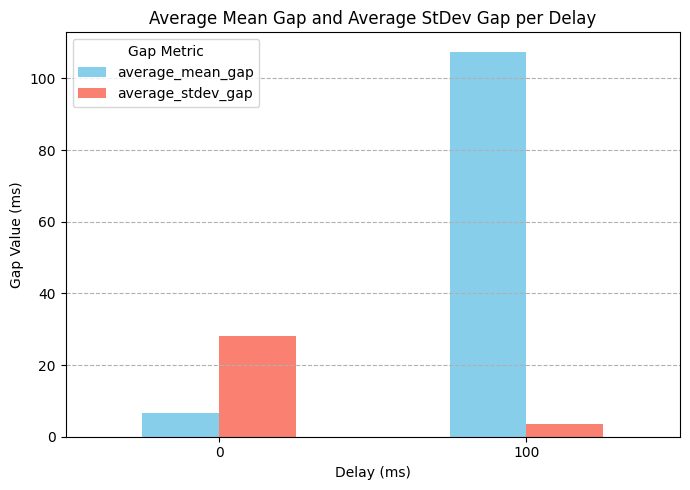

In [60]:
import matplotlib.pyplot as plt
import pandas as pd # Ensure pandas is imported


if 'df' in locals() and df is not None:
    # Group by 'delay' and calculate the mean of 'average_mean_gap' and 'average_stdev_gap'
    gap_metrics_per_delay = df.groupby('delay')[['average_mean_gap', 'average_stdev_gap']].mean()

    if not gap_metrics_per_delay.empty:
        ax = gap_metrics_per_delay.plot(kind='bar', figsize=FIG_SIZE, color=['skyblue', 'salmon'])
        plt.title('Average Mean Gap and Average StDev Gap per Delay')
        plt.xlabel('Delay (ms)')
        plt.ylabel('Gap Value (ms)') 
        plt.xticks(rotation=0)  
        plt.grid(axis='y', linestyle='--')
        plt.legend(title='Gap Metric') 
        plt.tight_layout()
        plt.show()
    else:
        print("No data available to plot for gap metrics after grouping by 'delay'.")
else:
    print("DataFrame 'df' not found or is None. Please ensure it is loaded in a previous cell.")


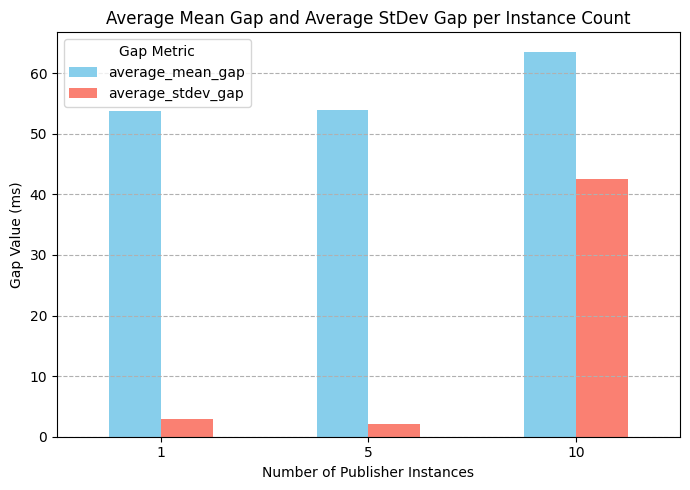

In [61]:
if 'df' in locals() and df is not None:
    # Group by 'instance_count' and calculate the mean of 'average_mean_gap' and 'average_stdev_gap'
    gap_metrics_per_instance_count = df.groupby('instance_count')[['average_mean_gap', 'average_stdev_gap']].mean()

    if not gap_metrics_per_instance_count.empty:
        gap_metrics_per_instance_count.plot(kind='bar', figsize=FIG_SIZE, color=['skyblue', 'salmon']) 
        plt.title('Average Mean Gap and Average StDev Gap per Instance Count')
        plt.xlabel('Number of Publisher Instances')
        plt.ylabel('Gap Value (ms)') 
        plt.xticks(rotation=0)  
        plt.grid(axis='y', linestyle='--')
        plt.legend(title='Gap Metric') 
        plt.tight_layout()
        plt.show()
    else:
        print("No data available to plot for gap metrics after grouping by 'instance_count'.")
else:
    print("DataFrame 'df' not found or is None. Please ensure it is loaded in a previous cell.")
